<a href="https://colab.research.google.com/github/zqzhu0609/R/blob/main/GSEA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db")
BiocManager::install("msigdbr")
BiocManager::install("enrichplot")
BiocManager::install("fgsea")
# Load the libraries
library(clusterProfiler)
library(org.Hs.eg.db)
library(msigdbr)
library(enrichplot)
library(fgsea)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'BiocVersion', 'clusterProfiler'

also installing the dependencies ‘zlibbioc’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘formatR’, ‘XVector’, ‘GenomeInfoDb’, ‘lambda.r’, ‘futile.options’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘lazyeval’, ‘plogr’, ‘png’, ‘Biostrings’, ‘futile.logger’, ‘snow’, ‘BH’, ‘cowplot’, ‘fastmatch’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘BiocParallel’, ‘fgsea’, ‘reshape2’, ‘aplot’, ‘ggfun’, ‘ggnewscale’, ‘ggrepel’, ‘ggtangle’, ‘scatterpie’, ‘ggtree’, ‘R.utils’, ‘AnnotationD

In [7]:
# Load the CSV file
dir("/content/")
data <- read.csv('/content/WT2.csv')
# Check the first few rows of the data
head(data)

[1] "sample_data" "WT2.csv"

,Gene,Score
,<chr>,<dbl>
1,MYBPC1,9.000831
2,STEAP4,8.086381
3,SLC2A3,7.991232
4,ZNF812P,7.479244
5,SNAI2,7.023302
6,SLC2A14,6.928709


In [8]:
# Example: If the CSV file has columns "Gene" and "Rank"
ranked_list <- data$Score
names(ranked_list) <- data$Gene

# Sort the ranked list in decreasing order
ranked_list <- sort(ranked_list, decreasing = TRUE)

In [9]:
# Run GSEA with GO terms
gsea_result <- gseGO(
    geneList = ranked_list,
    ont = "BP",                    # Biological Process
    OrgDb = org.Hs.eg.db,          # Organism database
    keyType = "SYMBOL",            # Gene identifier type
    exponent = 1,
    minGSSize = 10,
    maxGSSize = 500,
    pvalueCutoff = 0.05,
    verbose = TRUE
)

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 57 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(path

In [10]:
# View the results
head(gsea_result)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0002181,GO:0002181,cytoplasmic translation,159,0.6012163,2.827878,1e-10,3.758125e-08,3.382895e-08,5988,"tags=73%, list=27%, signal=53%",PKP1/RBM24/CPEB3/SARS1/EIF3I/MTOR/EIF2S2/AARS1/RPS10/RPS18/RPL18/RPS5/RPL18A/RPL38/YBX3/RPS8/EIF3J/RPL8/RPS16/RPL7A/RPS11/RPL10/RACK1/FAU/RPL36/RPLP0/RPL13/RPS3/RPS15/RPL19/RPL3/RPS19/RPL12/IMPACT/RPS2/ETF1/PABPC1/EIF3G/RPS6/RPL13A/RPLP2/EIF3L/RPL14/RPS28/EIF3M/EIF3H/RPL15/RPS29/RPL4/RPL35A/RPS4X/RPS14/EIF2S3/EIF2B2/RPL29/EIF3F/RPL27/RPL32/RPLP1/RPL37A/YBX1/RPSA/EIF2B4/CSDE1/RPS13/CNBP/FTSJ1/RPL35/RPL28/RPL5/RPL27A/EIF3D/RPL24/NCK1/DRG1/EIF3K/RPL10A/RPS20/UBA52/RPS7/GTPBP1/RPS23/RPS21/EIF2B1/EIF4G1/PAIP1/ALKBH3/RPL22L1/RPS25/RPL6/RPS3A/ZC3H15/EIF2D/RPL23A/NMNAT2/EIF3A/RPL34/DENR/RPL30/SH3BGRL/RPS15A/RPL37/RWDD1/EIF3B/RPL31/RPS12/RPL26L1/FMR1/RPL11/DRG2/RPL9/HNRNPU/YTHDF2/EIF3E/RPL26/RPS24
GO:0030968,GO:0030968,endoplasmic reticulum unfolded protein response,79,0.6281911,2.712672,1e-10,3.758125e-08,3.382895e-08,5683,"tags=72%, list=26%, signal=54%",AGR2/CTH/ERN1/BHLHA15/ATF3/DNAJB9/FGF21/DDIT3/DNAJC10/CREB3L1/HERPUD1/FICD/SERP1/STC2/SELENOS/ATF4/EDEM3/EDEM2/CREB3/ERO1A/PPP1R15B/ASB11/EDEM1/ERLEC1/EIF2AK3/TMED2/RACK1/ATF6/HSPA5/TBL2/EIF2S1/MBTPS2/DDRGK1/TMEM33/NFE2L2/NCK1/VCP/AMFR/DERL1/WFS1/PTPN1/BBC3/CREBRF/STUB1/VAPB/HERPUD2/QRICH1/NCK2/RHBDD2/YOD1/DERL2/EIF2AK2/RNF7/COPS5/MBTPS1/OS9/XBP1
GO:0035967,GO:0035967,cellular response to topologically incorrect protein,107,0.5857710,2.661120,1e-10,3.758125e-08,3.382895e-08,5683,"tags=67%, list=26%, signal=50%",UMOD/AGR2/CTH/ERN1/BHLHA15/ATF3/DNAJB9/FGF21/DDIT3/DNAJC10/CREB3L1/HERPUD1/FICD/SERP1/STC2/SELENOS/ATF4/EDEM3/EDEM2/CREB3/ERO1A/PPP1R15B/ASB11/RHBDD1/EDEM1/HSPD1/ERLEC1/EIF2AK3/TMED2/RACK1/ATF6/HSPA5/TBL2/SDF2L1/DAXX/EIF2S1/MBTPS2/DDRGK1/TMEM33/BAG3/RNF126/NFE2L2/AKIRIN2/NCK1/VCP/AMFR/DERL1/UFD1/HSF1/CUL3/WFS1/UBR4/PTPN1/TMBIM6/BBC3/CREBRF/STUB1/VAPB/HERPUD2/DNAJB12/QRICH1/NCK2/RHBDD2/YOD1/DERL2/EIF2AK2/RNF7/COPS5/MBTPS1/OS9/UBE2W/XBP1
GO:0034620,GO:0034620,cellular response to unfolded protein,92,0.5965843,2.616829,1e-10,3.758125e-08,3.382895e-08,5122,"tags=64%, list=23%, signal=49%",UMOD/AGR2/CTH/ERN1/BHLHA15/ATF3/DNAJB9/FGF21/DDIT3/DNAJC10/CREB3L1/HERPUD1/FICD/SERP1/STC2/SELENOS/ATF4/EDEM3/EDEM2/CREB3/ERO1A/PPP1R15B/ASB11/RHBDD1/EDEM1/HSPD1/ERLEC1/EIF2AK3/TMED2/RACK1/ATF6/HSPA5/TBL2/DAXX/EIF2S1/MBTPS2/DDRGK1/TMEM33/BAG3/NFE2L2/NCK1/VCP/AMFR/DERL1/HSF1/WFS1/PTPN1/TMBIM6/BBC3/CREBRF/STUB1/VAPB/HERPUD2/QRICH1/NCK2/RHBDD2/YOD1/DERL2/EIF2AK2
GO:0006986,GO:0006986,response to unfolded protein,132,0.5621208,2.595289,1e-10,3.758125e-08,3.382895e-08,5122,"tags=60%, list=23%, signal=46%",UMOD/AGR2/CHAC1/CTH/ERN1/BHLHA15/ATF3/DNAJB9/FGF21/DDIT3/DNAJC10/CREB3L1/HERPUD1/FICD/SERP1/STC2/SELENOS/ATF4/EDEM3/EDEM2/HSPA2/DNAJC3/CREB3L4/TRAM1/HSPA6/CREB3/MANF/ERO1A/PPP1R15B/ASB11/RHBDD1/EDEM1/CREB3L2/HSPD1/DNAJB2/ERP44/ERLEC1/EIF2AK3/TMED2/RACK1/ATF6/HSPA5/TBL2/DAXX/EIF2S1/MBTPS2/DDRGK1/TMEM33/BAG3/HSPH1/NFE2L2/HSPE1/NCK1/VCP/AMFR/HSPA8/DERL1/DNAJA1/HSF1/HSP90AA1/WFS1/UBXN4/PTPN1/TMBIM6/BBC3/CREBRF/STUB1/VAPB/HSP90AB1/HERPUD2/MFN2/DNAJC4/KBTBD6/QRICH1/NCK2/RHBDD2/YOD1/DERL2/EIF2AK2
GO:0006888,GO:0006888,endoplasmic reticulum to Golgi vesicle-mediated transport,127,0.5660377,2.585651,1e-10,3.758125e-08,3.382895e-08,4452,"tags=59%, list=20%, signal=47%",SEC24D/SEC16B/COPG1/BCAP29/ARF4/ARCN1/CTAGE1/ANK1/MIA2/SEC23B/COPE/BET1/YKT6/YIF1A/HYOU1/RAB1A/SCAP/SURF4/CTAGE6/COPB1/TRAPPC3/USO1/TMED9/CREB3L2/TMED10/LRRK2/PREB/TMED3/ERGIC2/YIPF5/SEC24B/TMED2/COPA/SEC31A/COPB2/SEC22B/SEC24A/SEC24C/STX5/P4HB/SEC13/TMED5/SEC16A/SAR1B/LMAN1/LMAN2/TRAPPC4/TMED1/GOLT1B/TMED7/SEC22C/INSIG1/CTAGE8/TBC1D20/TFG/RAB1B/VAPA/COG3/WHAMM/TRAPPC5/ERGIC3/ERGIC1/GOLGA2/TRAPPC6A/VCP/STX18/GBF1/NRBP1/BCAP31/CUL3/PEF1/PPP6C/YIF1B/TRAPPC2B/VAPB


In [11]:
# Load MSigDB gene sets (e.g., Hallmark gene sets)
msigdb_sets <- msigdbr(species = "Homo sapiens", category = "H")

# Convert to a list of gene sets
gene_sets <- split(msigdb_sets$gene_symbol, msigdb_sets$gs_name)

# Run GSEA with fgsea
fgsea_result <- fgsea(
    pathways = gene_sets,
    stats = ranked_list,
    minSize = 10,
    maxSize = 500,
    eps = 0.0,
    scoreType = "std"
)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [12]:
# View the results
head(fgsea_result[order(pval), ])

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_ANDROGEN_RESPONSE,1.414943e-37,7.074713e-36,1.5959567,0.8167013,3.651628,100,"STEAP4, ...."
HALLMARK_OXIDATIVE_PHOSPHORYLATION,2.178857e-17,5.447142e-16,1.0768682,0.5116186,2.626945,197,"GLUD1, I...."
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,1.552008e-16,2.586680e-15,1.0476265,0.6150965,2.851773,111,"CHAC1, E...."
HALLMARK_MTORC1_SIGNALING,5.198084e-14,6.497604e-13,0.9653278,0.4787540,2.451360,199,"SLC2A3, ...."
HALLMARK_MYC_TARGETS_V1,4.789776e-10,4.789776e-09,0.8012156,0.4259975,2.132519,195,"ODC1, PS...."
HALLMARK_E2F_TARGETS,4.012205e-09,3.343504e-08,0.7614608,-0.5132772,-1.864841,197,"RRM2, ES...."


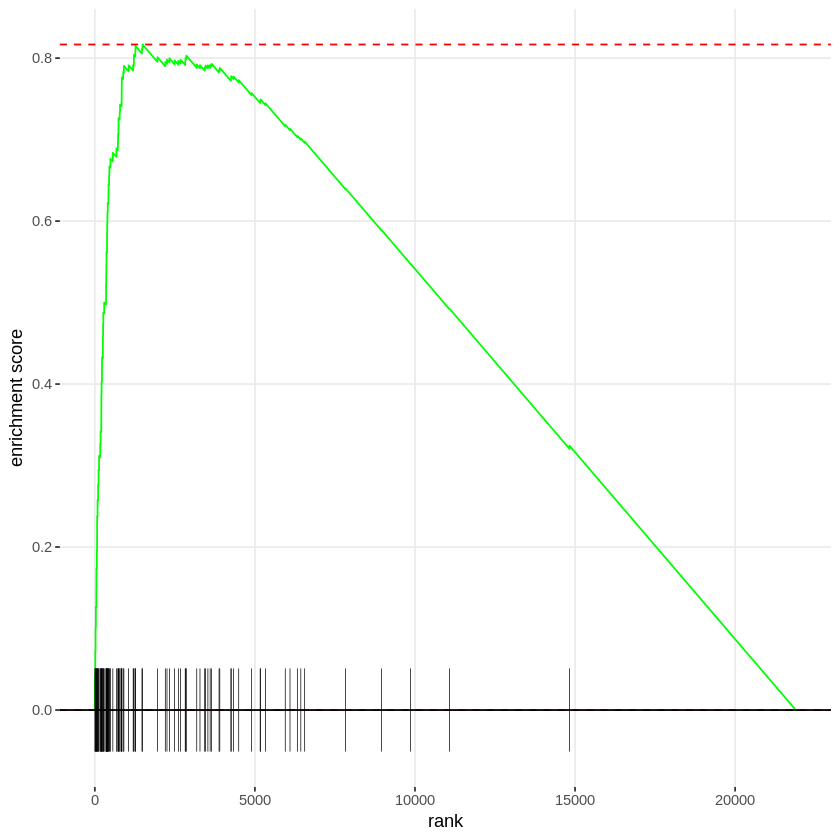

In [13]:
# Plot the enrichment plot for a specific gene set
plotEnrichment(gene_sets[["HALLMARK_ANDROGEN_RESPONSE"]], ranked_list)  # Replace with your gene set of interest